In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/kaggle/input/gender-by-name/name_gender_dataset.csv")

In [7]:
df.describe

<bound method NDFrame.describe of            Name Gender    Count   Probability
0         James      M  5304407  1.451679e-02
1          John      M  5260831  1.439753e-02
2        Robert      M  4970386  1.360266e-02
3       Michael      M  4579950  1.253414e-02
4       William      M  4226608  1.156713e-02
...         ...    ...      ...           ...
147264   Zylenn      M        1  2.736740e-09
147265   Zymeon      M        1  2.736740e-09
147266   Zyndel      M        1  2.736740e-09
147267   Zyshan      M        1  2.736740e-09
147268    Zyton      M        1  2.736740e-09

[147269 rows x 4 columns]>

In [8]:
df.shape

(147269, 4)

In [11]:
df.info

<bound method DataFrame.info of            Name Gender    Count   Probability
0         James      M  5304407  1.451679e-02
1          John      M  5260831  1.439753e-02
2        Robert      M  4970386  1.360266e-02
3       Michael      M  4579950  1.253414e-02
4       William      M  4226608  1.156713e-02
...         ...    ...      ...           ...
147264   Zylenn      M        1  2.736740e-09
147265   Zymeon      M        1  2.736740e-09
147266   Zyndel      M        1  2.736740e-09
147267   Zyshan      M        1  2.736740e-09
147268    Zyton      M        1  2.736740e-09

[147269 rows x 4 columns]>

In [13]:
df.head(5)

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [14]:
df.isnull().sum()

Name           0
Gender         0
Count          0
Probability    0
dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

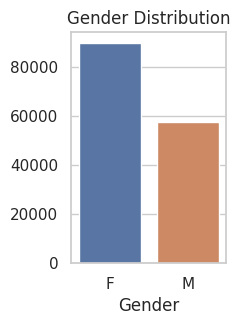

In [25]:
sns.set(style = "whitegrid")
num_gender = df["Gender"].value_counts()

plt.figure(figsize=(2,3))
sns.barplot(x = num_gender.index, y = num_gender.values)
plt.title("Gender Distribution")
plt.show()

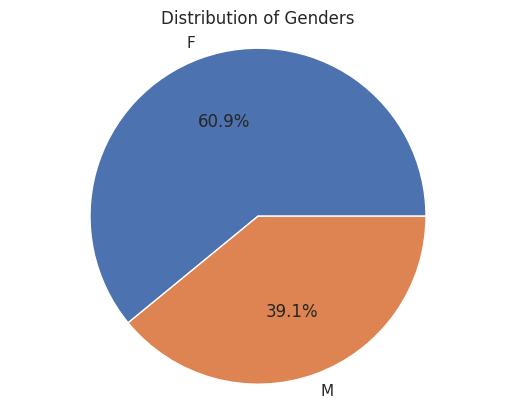

In [29]:
plt.pie(num_gender, labels = num_gender.index, autopct = "%1.1f%%")
plt.title("Distribution of Genders")
plt.axis("equal")
plt.show()

In [31]:
df = df.sort_values(by = ["Count"], ascending = False)
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


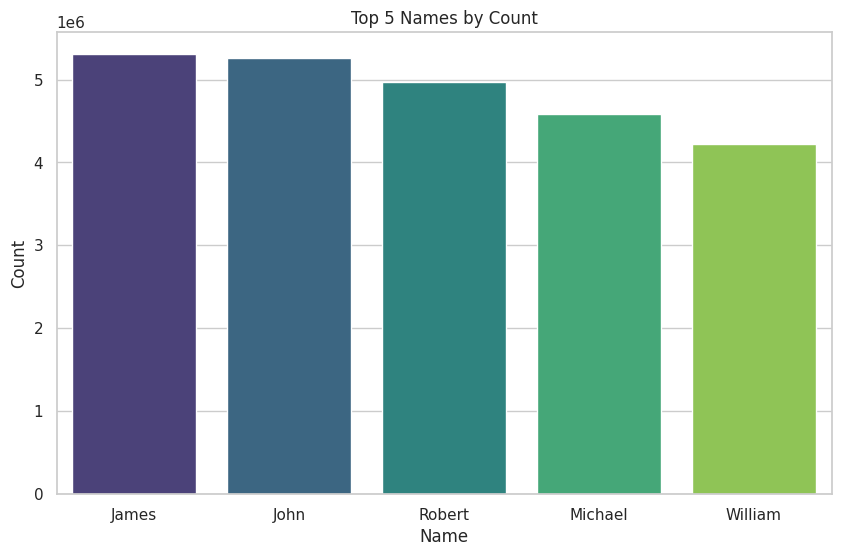

In [44]:
def top_names(data, top = 5):
    top_names = data.sort_values(by = ["Count"], ascending = False).head(top)
    plt.figure(figsize= (10,6))
    sns.barplot(data = top_names, x = "Name" , y = "Count" , palette="viridis")
    plt.title(f"Top {top} Names by Count")
    plt.show()
    
top_names(df)

 #   top_names = data.sort_values(by='Count', ascending=False).head(top)
 #   plt.figure(figsize=(10, 6))
 #   sns.barplot(data=top_names, x='Name', y='Count', palette='viridis')
 #   plt.title(f'Top {top} Names by Count')
 #   plt.xlabel('Name')
 #   plt.ylabel('Count')
 #   plt.xticks(rotation=45)
 #   plt.show()

#top_names(df)
    


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['Gender'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Gender'])

categorical_cols = ['Name']
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_pred = logistic_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [50]:
def model_results(model,y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    cr= classification_report(y_true, y_pred)
    print(f'Model: {model}')
    print(accuracy)
    print(cr)

model_results(logistic_model, y_test, logistic_pred)

model_results("Random Forest", y_test, rf_pred)

model_results("Decision Tree", y_test, dt_pred)

Model: LogisticRegression()
0.6101038908127928
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     17972
           1       0.43      0.00      0.00     11482

    accuracy                           0.61     29454
   macro avg       0.52      0.50      0.38     29454
weighted avg       0.54      0.61      0.46     29454

Model: Random Forest
0.5807360630135125
              precision    recall  f1-score   support

           0       0.65      0.68      0.66     17972
           1       0.46      0.43      0.44     11482

    accuracy                           0.58     29454
   macro avg       0.55      0.55      0.55     29454
weighted avg       0.58      0.58      0.58     29454

Model: Decision Tree
0.595810416242276
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     17972
           1       0.48      0.49      0.48     11482

    accuracy                           0.60     29454
  

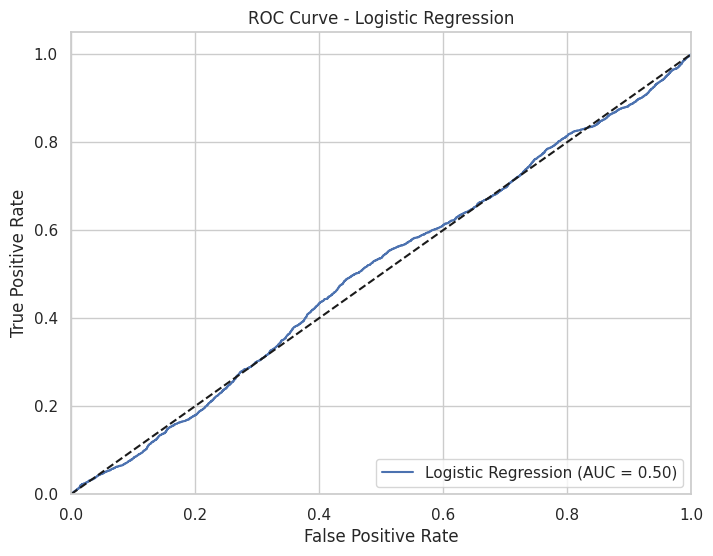

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

logistic_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

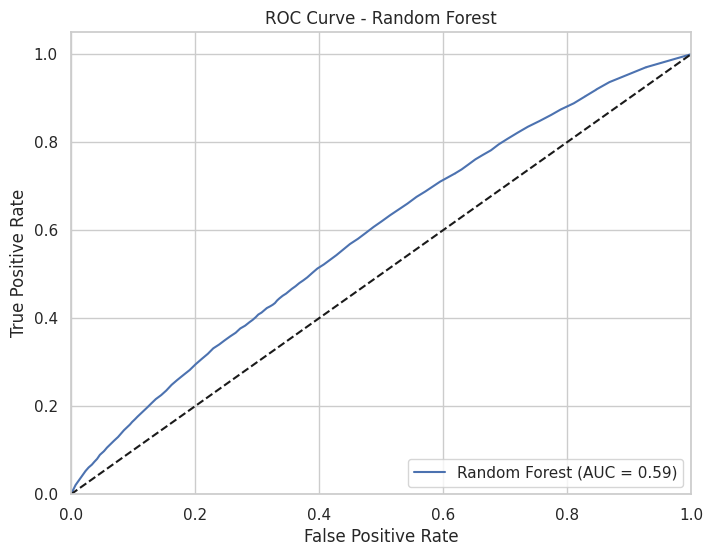

In [52]:
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

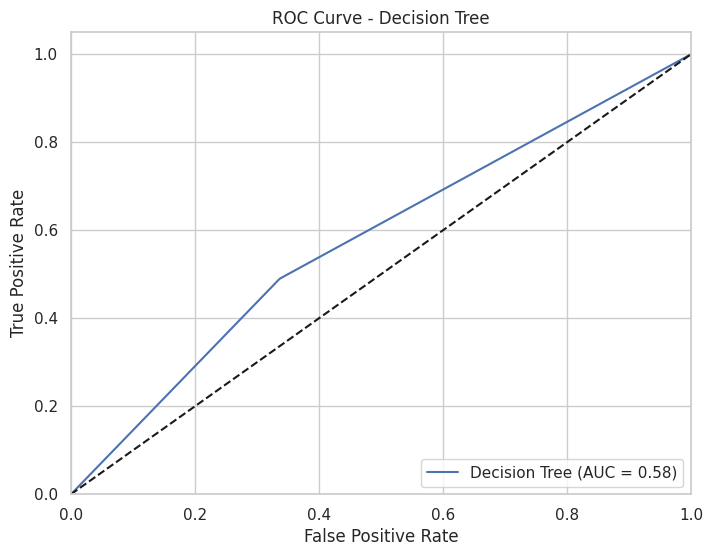

In [53]:
dt_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()